# Ex1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [2]:
import numpy as np 
import time
start = time.time()
rand = np.random.random(1000)
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight/=weight.sum()
axis = [weight[:i].sum() for i in range(1,11)]
l = np.arange(10)
num = []
for i in range(1000):
    a = np.array([rand[i] < axis])
    num.append(l[a[0] == True][0])
import matplotlib.pyplot as plt 
end = time.time()
print('Time = ', end-start)
plt.hist(num) 
plt.show()


Time =  1.4650542736053467


<Figure size 640x480 with 1 Axes>

Time =  0.02000117301940918


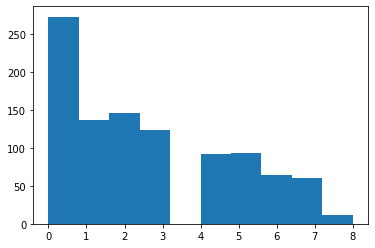

In [3]:
start = time.time()
rand = np.random.random(1000)
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight/=weight.sum()
weight = np.sort(weight)[::-1]
axis = [weight[:i].sum() for i in range(1,11)]
l = np.arange(10)
num = []
for i in range(1000):
    a = np.array([rand[i] < axis])
    num.append(l[a[0] == True][0])
end = time.time()
print('Time = ', end-start)
plt.hist(num) 
plt.show()

# Ex2

Смделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

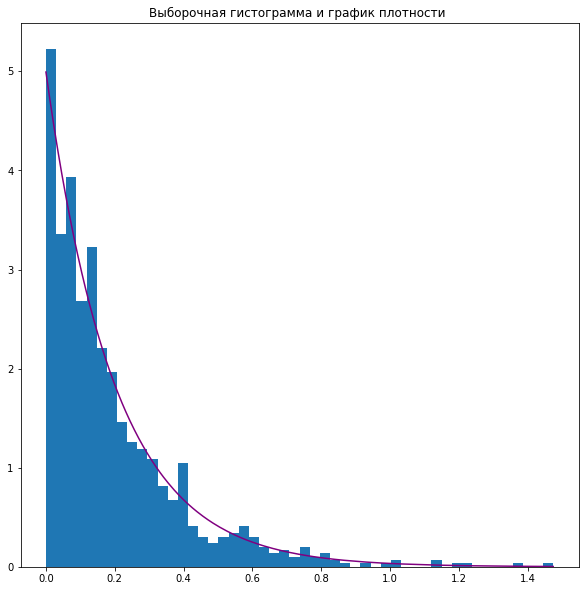

In [4]:
from math import exp, log
a = 5
plt.figure(figsize=(10,10))
rand = np.random.random(1000)
rand.sort()
x = [-1/a*log(1 - rand[i]) for i in range(1000)]
plt.hist(x, density = True, bins = 50)
p = [a*exp(-a*x[i]) for i in range(1000)]
plt.plot(x, p, color = 'purple')
plt.title("Выборочная гистограмма и график плотности ")
plt.show()

# Ex3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

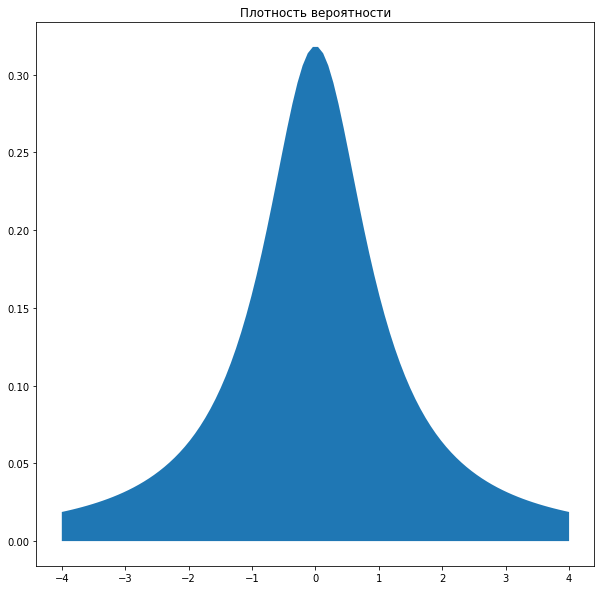

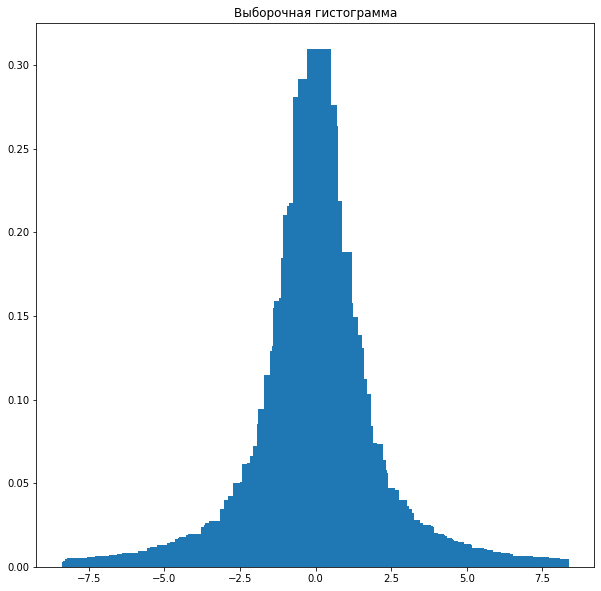

In [108]:
from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.figure(figsize = ((10,10)))
plt.fill_between(x, 0, dist.pdf(x))
plt.title("Плотность вероятности")
plt.show()

from math import pi
rand = [16*np.random.rand()-8 for i in range(1000)]
rand.sort()
cauch = []
k=0
while k!=1000:
    t = 1/pi*np.random.rand()
    if t < 1/(pi*(1+rand[k]*rand[k])):
        cauch.append(t)
        k+=1
plt.figure(figsize = ((10,10)))
plt.title("Выборочная гистограмма")
plt.bar(rand, cauch)
plt.show()


# Ex 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

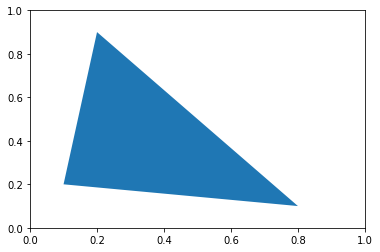

In [109]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

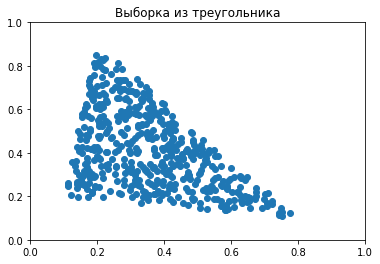

In [6]:
import math
x = np.random.rand(500)
y = np.random.rand(500)
for i in range(500):
    if y[i]>-x[i]+1:
        x[i]=-x[i]+1
        y[i]=-y[i]+1        
x*=math.hypot(0.7, 0.1)
y*=math.hypot(0.7, 0.1)
tg = math.atan2(-1, 7)
xnew = x
x = x*math.cos(tg)-y*math.sin(tg)+0.1
y = xnew*math.sin(tg)+y*math.cos(tg)+0.2
plt.scatter(x, y)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника")
plt.show()

# Ex5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

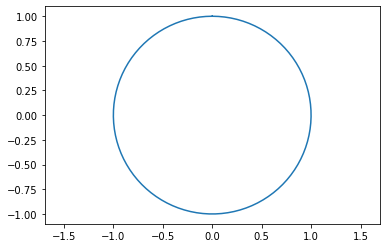

In [5]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

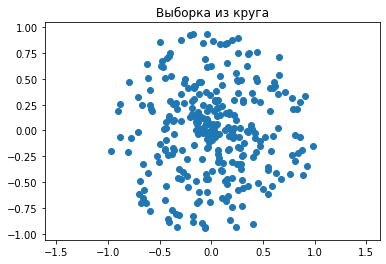

In [42]:
import math
r = np.random.rand(300)
p = np.random.rand(300)
p*=2*np.pi
x = r * np.cos(p)
y = r * np.sin(p)
plt.scatter(x, y)
plt.title("Выборка из круга")
plt.axis('equal')
plt.show()

# Ex 6

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

Мы хотим, чтобы наш путь замкнулся, для этого необходимо требовать, чтобы n было четным. В одномерном случае имеем только два варианта: ходим влево-0 и вправо-1. Для того, чтобы вернуться в начальную точку, нужно чтобы число 0 и 1 было одинаково (одномерный умеем строить с помощью random.choice). При переходе к 2 мерному случаю, у нас возникают зависимые хождения. Чтобы сделать их независимыми "повернем" координатную сетку на 45 градусов. Возможные варианты теперь (-1,-1), (-1,1), (1,-1), (1,1). Построим 2 одномерных массива и объединим их

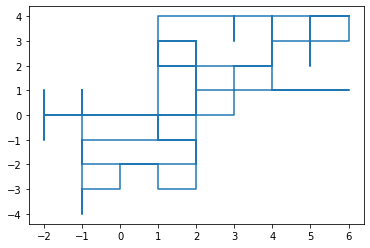

In [48]:
n = 100
firstind = np.random.choice(np.arange(n), n//2, replace = False)
secondind = np.random.choice(np.arange(n), n//2, replace = False)
f = np.ones(n)
f[firstind] = -1;
s = np.ones(n)
s[secondind] = -1;
first = np.cumsum(f)
second = np.cumsum(s)
x = (first + second)/2
y = (first - second)/2
plt.plot(x,y)

# Ex 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

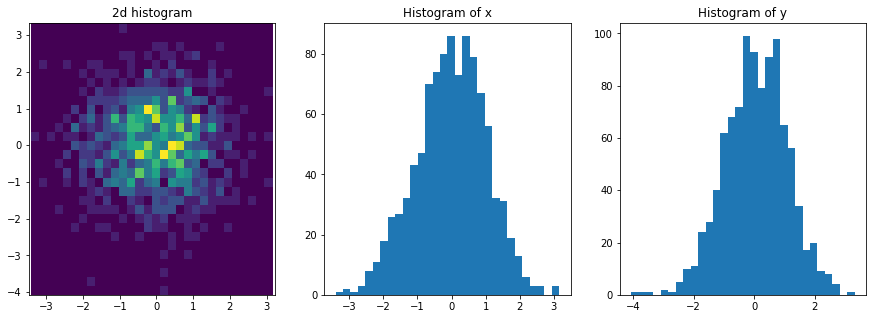

In [49]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

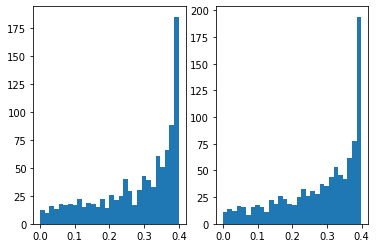

In [55]:
newx = np.sqrt(1/(2*np.pi))*np.exp(-x**2/2)
newy = np.sqrt(1/(2*np.pi))*np.exp(-y**2/2)
plt.subplot(1,2,1)
plt.hist(newx,bins = 30)
plt.subplot(1,2,2)
plt.hist(newy,bins = 30)
plt.show()

При подстановке xnew, ynew получили график плотности нормально распредленных величин на определенном отрезке. Значит можно сделать вывод, что исходные величины были N(0,1)

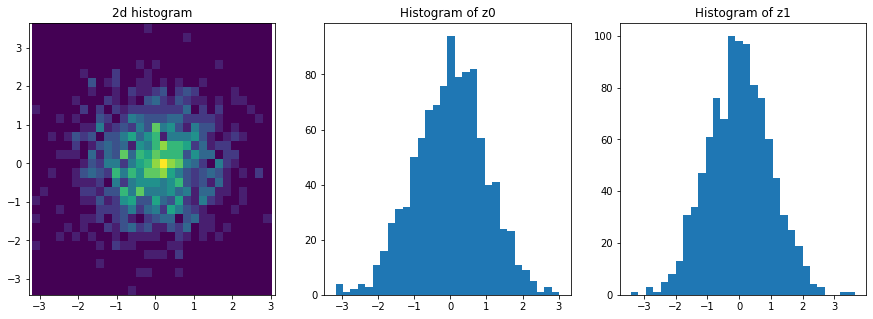

In [57]:
import math
i = 0
n = 1000
u1 = np.array([])
u2 = np.array([])

while i<n:
    u,v = 2*np.random.rand(2, 1)-1
    R0=u**2+v**2
    if 0<R0<=1:
        u1 = np.append(u1,u)
        u2 = np.append(u2,v)
        i+=1
        
R = u1**2+u2**2
x = u1 * np.sqrt((-2*np.log(R))/R)
y = u2 * np.sqrt((-2*np.log(R))/R)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of z0")
ax[2].set_title("Histogram of z1")
plt.show()


# Ex 8

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [71]:
def gen(n, kol):
    f = 1
    var = np.zeros(n)
    for i in range(n):
        f *= (i + 1)
        var[i] = (i + 1)**n / f
    var/= var.sum() #чтобы сумма была единицей
    group = np.random.choice(np.arange(1, n + 1), p = var, size = kol)
    a = np.zeros((kol, n))
    for i in range(kol):
        a[i, :] = np.random.choice(np.arange(1, group[i] + 1), size = n)
    return a

In [72]:
gen(100, 10000).max(axis=1).mean() #считаем мат ожидание числа подмножеств в случайном разбиении множества

29.5977